**# Linear Regression**<br>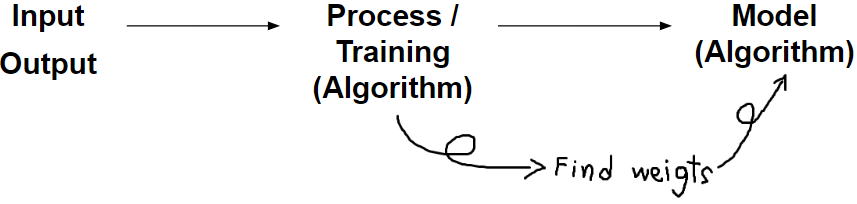

In [41]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/mejessie/Walmart-Linear-Regression-with-Numpy/main/Walmart.csv")

print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

In [59]:
x = df.iloc[:, 3:].values
y = df.iloc[:, 2].values

print(x)
print(y)

[[  0.         42.31        2.572     211.0963582   8.106    ]
 [  1.         38.51        2.548     211.2421698   8.106    ]
 [  0.         39.93        2.514     211.2891429   8.106    ]
 ...
 [  0.         54.47        4.        192.3272654   8.667    ]
 [  0.         56.47        3.969     192.3308542   8.667    ]
 [  0.         58.85        3.882     192.3088989   8.667    ]]
[1643690.9  1641957.44 1611968.17 ...  734464.36  718125.53  760281.43]


In [50]:
# Add a front column with all elements as 1
x_w = np.c_[np.ones(len(x)), x]

print(x_w)

[[  1.          0.         42.31        2.572     211.0963582   8.106    ]
 [  1.          1.         38.51        2.548     211.2421698   8.106    ]
 [  1.          0.         39.93        2.514     211.2891429   8.106    ]
 ...
 [  1.          0.         54.47        4.        192.3272654   8.667    ]
 [  1.          0.         56.47        3.969     192.3308542   8.667    ]
 [  1.          0.         58.85        3.882     192.3088989   8.667    ]]


# Training the model using the calculated weights<br>image.png

In [54]:
# Calc the weights
w = np.linalg.inv(x_w.T.dot(x_w)).dot(x_w.T).dot(y)

print(w)

[ 1.72652339e+06  7.48916609e+04 -7.24171518e+02 -1.01678784e+04
 -1.59887168e+03 -4.15522809e+04]


# Building the model<br>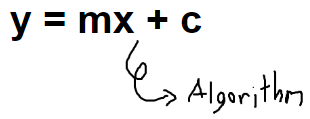

In [76]:
y_hat = x.dot(w[1:].T) + w[0]

pd.DataFrame(np.vstack([y, y_hat]).T)

,0,1
0,1643690.90,9.953931e+05
1,1641957.44,1.073048e+06
2,1611968.17,9.973982e+05
3,1409727.59,9.920196e+05
4,1554806.68,9.914142e+05
...,...,...
6430,713173.95,9.710531e+05
6431,733455.07,9.716235e+05
6432,734464.36,9.787660e+05
6433,718125.53,9.776271e+05


# Evaluate the model using Root Mean Square Error (RMSE)

In [47]:
# Calc SSE
SSE = np.sum((y - y_hat) ** 2)

# Calc RMSE
RMSE = np.sqrt(SSE / len(y))

print(f"RMSE = {RMSE}")

RMSE = 557097.2925710742
